# Алгоритм Нидлмана-Вунша

**Задача:** 

реализовать алгоритм для выравнивания двух последовательностей большой длины.

**Выполнили:** 
- Здрогова Дарья, 
- Смолин Павел, 
- Антропова Ольга, 
- Фаттахов Марат.

## Общая идея алгоритма и его реализация

Это алгоритм, который вычисляет наивысший балл для 2 выравниваний последовательностей на основе матрицы баллов (матрицы замены).

**Ключевые элементы:**

1. **Матрица оценок** - разные оценки для совпадающих и несовпадающих букв, линейный штраф за разрыв (число, вычитаемое за каждый разрыв).

   **Фрагмент кода с созданием матрицы:**

In [ ]:
a = [[0 for _ in range(len(s1) + 1)] for _ in range(len(s2) + 1)] 
for i in range(len(s2) + 1):
    a[i][0] = -i
for j in range(len(s1) + 1):
    а[0][j] = -j

2. **Алгоритм расчета** наивысшего балла сравнения: назначается двумерный массив (или матрица), содержащая столько же строк, сколько символов в первой последовательности, и столько же столбцов, сколько символов во второй последовательности. Запись в строке ***i*** и столбце ***j*** обозначается как ***F(i, j)***. 
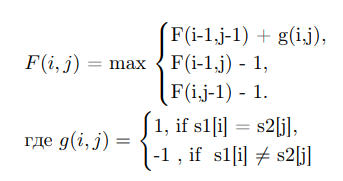

**Работа алгоритма:**

Для вычисления самого выравнивания, которое получило такую оценку, нужно начать с правой нижней клетки и сравнивать значение в ней с клетками, которые находятся левее, выше или по вверх и влево по диагонали

**Код для заполнения матрицы оценок:**

In [ ]:
gap = -1
for i in range(1, len(s2) + 1):
        for j in range(1, len(s1) + 1):
            a[i][j] = max(a[i - 1][j - 1] + (match if s2[i - 1] == s1[j - 1] else mismatch),
                          a[i - 1][j] + gap, a[i][j - 1] + gap)

**Нахождение оптимального выравнивания по матрице:**


**Главная задача:** выравнивание последовательностей оптимальным вариантом, совпадение букв или пропуск (пробел) для двух последовательностей будут иметь положительную оценку, а за сопоставление разных букв будет назначаться штраф.

**Алгоритм:**
Сначала устанавливается исходная клетка - начало пути оптимального варианта выравнивания по матрице - нижняя правая клетка. 
Создается 2 пустых строки, которые будут результатами работы нашего алгоритма. 
Далее совершается проход по матрице, где выбирается клетка (слева, сверху или по сверху/влево (по диагонали)) с максимальным весом в матрице весов.
Если мы дошли до верхней (или правой) границы матрицы весов, то продолжаем двигаться вдоль нее до верхней левой клетки, к первой строке добавляются символы, в ячейки которых мы переходим, а ко второй добавляются пробелы. 

In [ ]:
i = len(s2)
    j = len(s1)
    s1n = ''
    s2n = ''
    while i > 0 or j > 0:
        if i == 0:
            s1n = s1[:j] + s1n
            s2n = '-' * (j) + s2n
            break

        if j == 0:
            s2n = s2[:i] + s2n
            s1n = '-' * (i) + s1n
            break

        score = a[i][j]
        scoreDiag = a[i - 1][j - 1]
        scoreUp = a[i - 1][j]
        scoreLeft = a[i][j - 1]
        if s1[j - 1] == s2[i - 1] and score == scoreDiag + match:
            s1n = s1[j - 1] + s1n
            s2n = s2[i - 1] + s2n
            i -= 1
            j -= 1
        elif s1[j - 1] != s2[i - 1] and score == scoreDiag + mismatch:  
            s1n = s1[j - 1] + s1n
            s2n = s2[i - 1] + s2n
            i -= 1
            j -= 1
        elif score == scoreUp + gap:
            s1n = '-' + s1n
            s2n = s2[i - 1] + s2n
            i -= 1
        elif  score == scoreLeft + gap:
            s2n = '-' + s2n
            s1n = s1[j - 1] + s1n
            j -= 1

## Оценка работы алгоритма

Для проверки работы алгоритма были взяты строки длиной больше 10^4  символов, для которых оптимальный способ выравнивания можно определить вручную.

**Один из тестов**

- Исходная строка А: aaa...abbbbb
- Исходная строка B: bbbbbc...ccccc.

Так как для нас приоритетнее пропуск в строках результата, чем сопоставление разных символов, очевидно, что выравнивание должно иметь вид:

                    aaa...abbbbb--...-
                    ---...-bbbbbcc...c
                
Алгоритм выводит такой же результат. Аналогичные результаты мы получаем и на остальных тестах.

**Вывод:** алгоритм справляется с задачей выравнивания последовательностей, находя оптимальный способ сопоставления двух строк.

**Оценка времени на оригинальном интерпретаторе python 3.8 и pypy 3.8**

In [77]:
with open('tests_only_time.txt') as file:
    s = file.read()
s = s.split('#')
s = list(map(lambda x: x.split('\n')[0::2], s))
s = list(map(lambda x: list(map(lambda t: t.split(': ')[-1], x)), s))
pypy_4 = list(map(float, s[0][1:]))
pypy_3 = list(map(float, s[1][1:]))
pypy_2 = list(map(float, s[2][1:]))
python_4 = list(map(float, s[3][1:]))
python_3 = list(map(float, s[4][1:]))
python_2 = list(map(float, s[5][1:]))

import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame({'interpreter': ['pypy' for _ in range(15)] + ['python' for _ in range(15)],
                   'size': ['10^4' for _ in range(5)] + ['10^3' for _ in range(5)] + ['10^2' for _ in range(5)] +\
                   ['10^4' for _ in range(5)] + ['10^3' for _ in range(5)] + ['10^2' for _ in range(5)],
                   'time': pypy_4 + pypy_3 + pypy_2 + python_4 + python_3 + python_2,
                   'test': [1, 2, 3, 4, 5] * 6})

fig1 = go.Figure(data=[
    go.Bar(x=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^4')]['test'],
           y=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^4')]['time'],
           name='pypy 10^4'),
    go.Bar(x=df[(df['interpreter'] == 'python') & (df['size'] == '10^4')]['test'],
           y=df[(df['interpreter'] == 'python') & (df['size'] == '10^4')]['time'],
           name='python 10^4'),
])
fig1.update_yaxes(type="log", title_text='time in secs')
fig1.update_xaxes(title_text='test №')
fig1.update_layout(barmode='group')

fig2 = go.Figure(data=[
    go.Bar(x=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^3')]['test'],
           y=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^3')]['time'],
           name='pypy 10^3'),
    go.Bar(x=df[(df['interpreter'] == 'python') & (df['size'] == '10^3')]['test'],
           y=df[(df['interpreter'] == 'python') & (df['size'] == '10^3')]['time'],
           name='python 10^3'),
])
fig2.update_yaxes(type="log", title_text='time in secs')
fig2.update_xaxes(title_text='test №')
fig2.update_layout(barmode='group')

fig3 = go.Figure(data=[
    go.Bar(x=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^2')]['test'],
           y=df[(df['interpreter'] == 'pypy') & (df['size'] == '10^2')]['time'],
           name='pypy 10^2'),
    go.Bar(x=df[(df['interpreter'] == 'python') & (df['size'] == '10^2')]['test'],
           y=df[(df['interpreter'] == 'python') & (df['size'] == '10^2')]['time'],
           name='python 10^2'),
])
fig3.update_yaxes(type="log", title_text='time in secs')
fig3.update_xaxes(title_text='test №')
fig3.update_layout(barmode='group')

fig1.show()
fig2.show()
fig3.show()

**Вывод из тестов:** <i>pypy</i> хоть и помогает в большинстве случаев, особенно на длинных строках, но бывают ситуации, когда он справляется хуже, например тесты 2, 3 на 10^3. Но приросты в 28490 раз (на 2848900%), как в тесте 2 - поражают.
Тесты размеров 10^5 и больше провести сложно, программа упирается больше в память, чем во время исполнения.
Если учитывать время на тестах 4, 5 на 10^3, 10^4, 10^5 символов в строках, то возрастание необходимого времени не меньше половины квадрата предыдущего возрастания, из чего слеует, что тест 4 должен выполняться не менее 1500 секунд, а тест 5 не меньше 100, что, к сожалению, мы не можем проверить в реальности.